In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk


General Education Courses Distribution:
English Language - Credit Hours: 3
English Language Lab - Credit Hours: 1
Islam and Relig Std - Credit Hours: 3
Pakistan Studies - Credit Hours: 3
English Composition - Credit Hours: 3
TBW - Credit Hours: 3
Total Credit Hours Cleared in General Education: 16

University Elective Courses Distribution:
Psychology - Credit Hours: 3
Arabic Language - Credit Hours: 3
International HR Mgmt - Credit Hours: 3
IS Audit and Control - Credit Hours: 3
Fund of Management - Credit Hours: 3
Total Credit Hours Cleared in University Elective: 15

Mathematics and Science Foundation Courses Distribution:
Basic Electronics - Credit Hours: 3
Calculus - I - Credit Hours: 3
Linear Algebra - Credit Hours: 3
Probability and Stat - Credit Hours: 4
Linear Algebra - Credit Hours: 3
Linear Algebra - Credit Hours: 3
Total Credit Hours Cleared in Mathematics and Science Foundation: 19

Computer Science Core Courses Distribution:
Intro to Computing - Credit Hours: 3
Intro to C

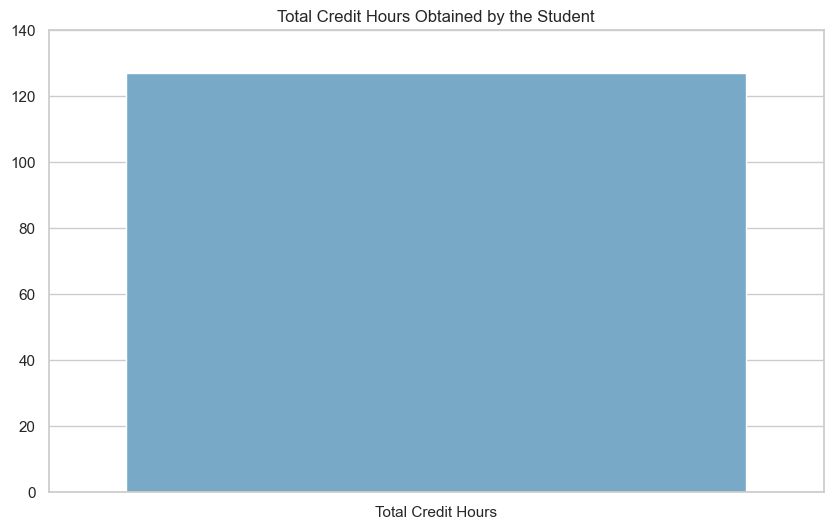

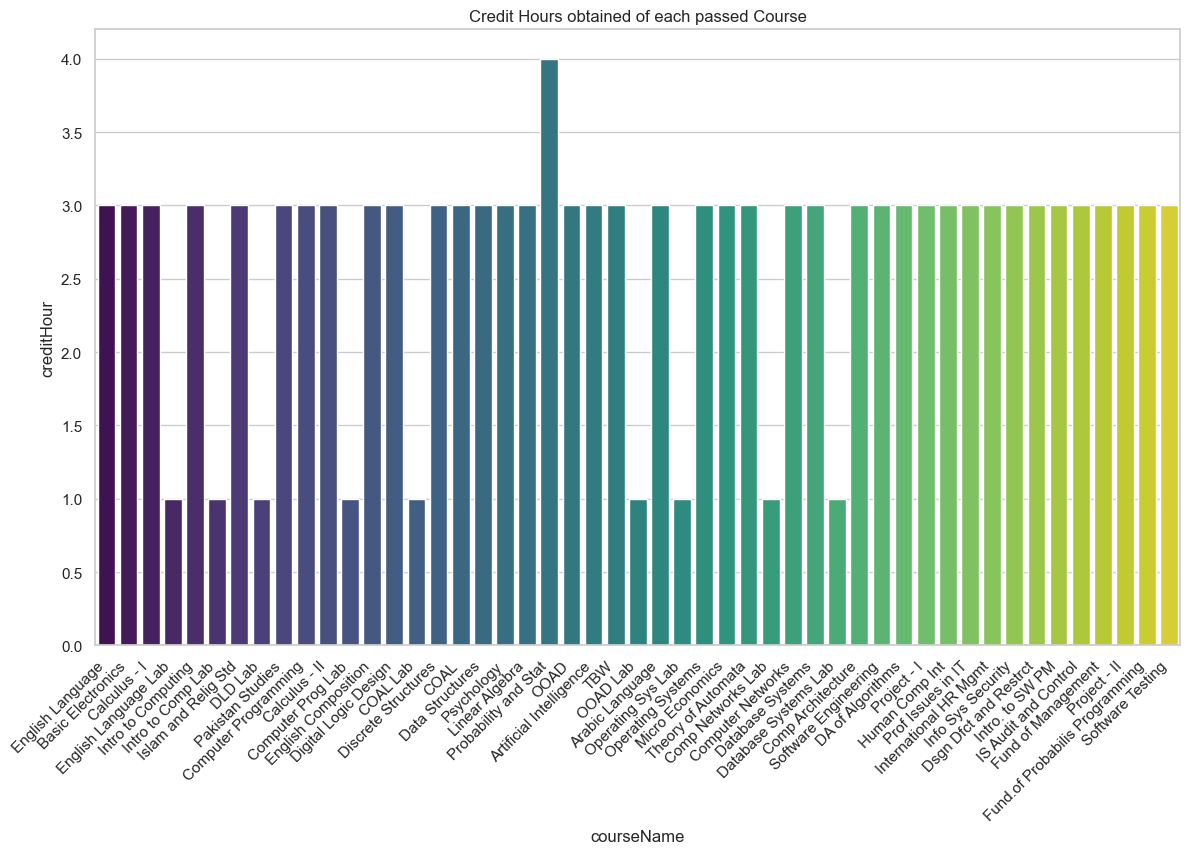

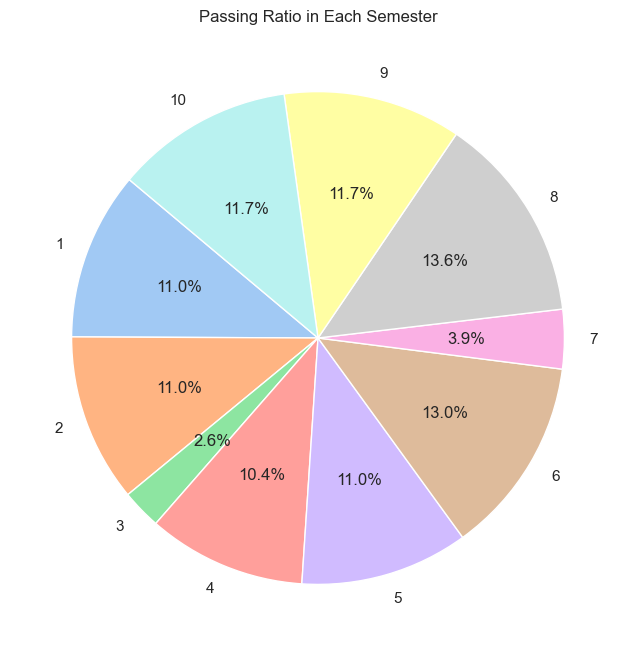

In [25]:
# Defining course groups
course_groups = {
    "General Education": ["English Language", "English Language Lab", "English Composition",
                          "TBW", "Communication & Presentation Skills", "Professional Practices", 
                          "Introduction to Info. & Comm. Technologies", "Pakistan Studies", "Islam and Relig Std"],
    "University Elective": ["Arabic Language", "Psychology", "Fund of Management", "International HR Mgmt", "IS Audit and Control"],
    "Mathematics and Science Foundation": ["Calculus - I", "Probability and Stat", "Linear Algebra", "Basic Electronics"],
    "Computer Science Core": ["Intro to Computing", "Intro to Comp Lab", "Computer Programming", "OOAD", "OOAD Lab"
                              "Computer Prog Lab", "Data Structures", "Operating Systems",
                              "Operating Sys Lab", "Database Systems", "Database Systems Lab", "Compiler Construction", 
                              "COAL", "COAL Lab", "Software Engineering", "Computer Networks", "Comp Networks Lab",
                              "Info Sys Security","Digital Logic Design", "DLD Lab", "Discrete Structures"
                              "DA of Algorithms", "Parallel and Distributed Computing", "Artificial Intelligence", 
                              "Theory of Automata", "Project - I", "Project - II"],
    "Computer Science Supporting": ["Calculus - II", "Graph Theory", "Proff of Programming Languages0", "Numerical Computing"],
    "Computer Science Elective": ["Dsgn Dfct and Restrct", "Info Sys Security", "Micro Economics",
                                  "Fund.of Probabilis Programming", "Software Testing"]
}

def show_message(message, font_size):
    root = tk.Tk()
    label = tk.Label(root, text=message, font=("Century Gothic", font_size))
    label.pack()
    root.mainloop()

def verify_hec_requirements(file_path, pre_req_path):
    student_df = pd.read_csv(r'C:/Users/kk/OneDrive/Desktop/UNIVERSITY/FIFTH SEMESTER/KRR/PROJECT/Test Std-0102.csv')
    pre_req_df = pd.read_csv(r'C:/Users/kk/OneDrive/Desktop/UNIVERSITY/FIFTH SEMESTER/KRR/PROJECT/Std-Courses 2.csv')
    total_crd_hrs_criteria = 130
    pre_req_clear = True

    for course_name in student_df['courseName'].unique():
        if not check_pre_req(student_df, pre_req_df, course_name):
            pre_req_clear = False
            break

    if pre_req_clear:
        messages = "All Pre-Reqs Cleared\n"
    else:
        messages = "All Pre-Reqs Not Cleared\n"

    student_crd_hrs = count_credit_hrs(student_df)

    if student_crd_hrs >= total_crd_hrs_criteria:
        messages += f"Total Credit Hours obtained: {student_crd_hrs}\n"
        messages += f"Total Credit Hours missing: {total_crd_hrs_criteria - student_crd_hrs}\n"
        messages += "Student has passed and achieved degree\n"
    else:
        messages += f"Total Credit Hours obtained: {student_crd_hrs}\n"
        messages += f"Total Credit Hours missing: {total_crd_hrs_criteria - student_crd_hrs}\n"
        messages += "Student has failed to achieve degree\n"
        messages += "\nCourses due to which degree got stopped:\n"
        for index, row in student_df.iterrows():
            if row['points'] == 0:
                messages += f"{row['courseName']} - Credit Hours: {row['creditHour']}, Type: {row['type']}\n"

    show_message(messages, 24)
    
    # Displaying distribution of cleared courses by group
    for group, courses in course_groups.items():
        cleared_courses = student_df[(student_df['courseName'].isin(courses)) & (student_df['creditHour'] > 0)]
        total_cleared_credit_hours = cleared_courses['creditHour'].sum()
        print(f"\n{group} Courses Distribution:")
        for index, row in cleared_courses.iterrows():
            print(f"{row['courseName']} - Credit Hours: {row['creditHour']}")
        print(f"Total Credit Hours Cleared in {group}: {total_cleared_credit_hours}")

    # Bar Plot for Total Credit Hours
    plt.figure(figsize=(10, 6))
    sns.barplot(x=["Total Credit Hours"], y=[student_crd_hrs], palette="Blues")
    plt.title("Total Credit Hours Obtained by the Student")
    plt.ylim(0, 140) 
    plt.show()
    
    # Bar Plot for All Courses and Their Credit Hours
    plt.figure(figsize=(14, 8))
    sns.barplot(x="courseName", y="creditHour", data=student_df, palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.title("Credit Hours obtained of each passed Course")
    plt.show()
    print("")
    print("")
    print("")
    
    # Pie Chart for Passed Courses in Each Semester
    passed_semesters = student_df[student_df['creditHour'] > 0].groupby('semester')['creditHour'].sum()
    plt.figure(figsize=(10, 8))
    plt.pie(passed_semesters, labels=passed_semesters.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title("Passing Ratio in Each Semester")
    plt.show()

def count_credit_hrs(student_data):
    student_crd_count = 0

    for index, row in student_data.iterrows():
        if 'lab' in row['courseName'].lower():
            theory_course = row['courseName'].replace(' Lab', '')
            theory_course_rows = student_data[(student_data['courseName'] == theory_course) & (student_data['points'] >= 1)]
            lab_course_rows = student_data[(student_data['courseName'] == row['courseName']) & (student_data['points'] >= 1)]

            if not theory_course_rows.empty and not lab_course_rows.empty:
                student_crd_count += lab_course_rows['creditHour'].values[0]
            elif not theory_course_rows.empty:
                student_crd_count += theory_course_rows['creditHour'].values[0]
        else:
            if row['points'] >= 1:
                student_crd_count += row['creditHour']

    return student_crd_count

def check_pre_req(student_df, pre_req_df, course_name):
    pre_req_course_df = pre_req_df[pre_req_df['courseName'] == course_name]['Pre-Requisite']

    if pre_req_course_df.empty or pre_req_course_df.values[0] == 'None':
        return True

    pre_req_course = pre_req_course_df.values[0]
    pre_req_passed = student_df[(student_df['courseName'] == pre_req_course) & (student_df['points'] >= 1)]

    if pre_req_passed['points'].empty or pre_req_passed['points'].iloc[0] < 1:
        return False

    return check_pre_req(student_df, pre_req_df, pre_req_course)

file_path = "Std-0102.csv"
pre_req_path = "Std-Courses 2.csv"

verify_hec_requirements(file_path, pre_req_path)
